In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import missingno.missingno as msno
from datetime import datetime
import seaborn as sns

In [2]:
df = pd.read_csv('marketing_campaign.csv')

df.head()

In [4]:
df.shape

(2240, 29)

### Find missing values

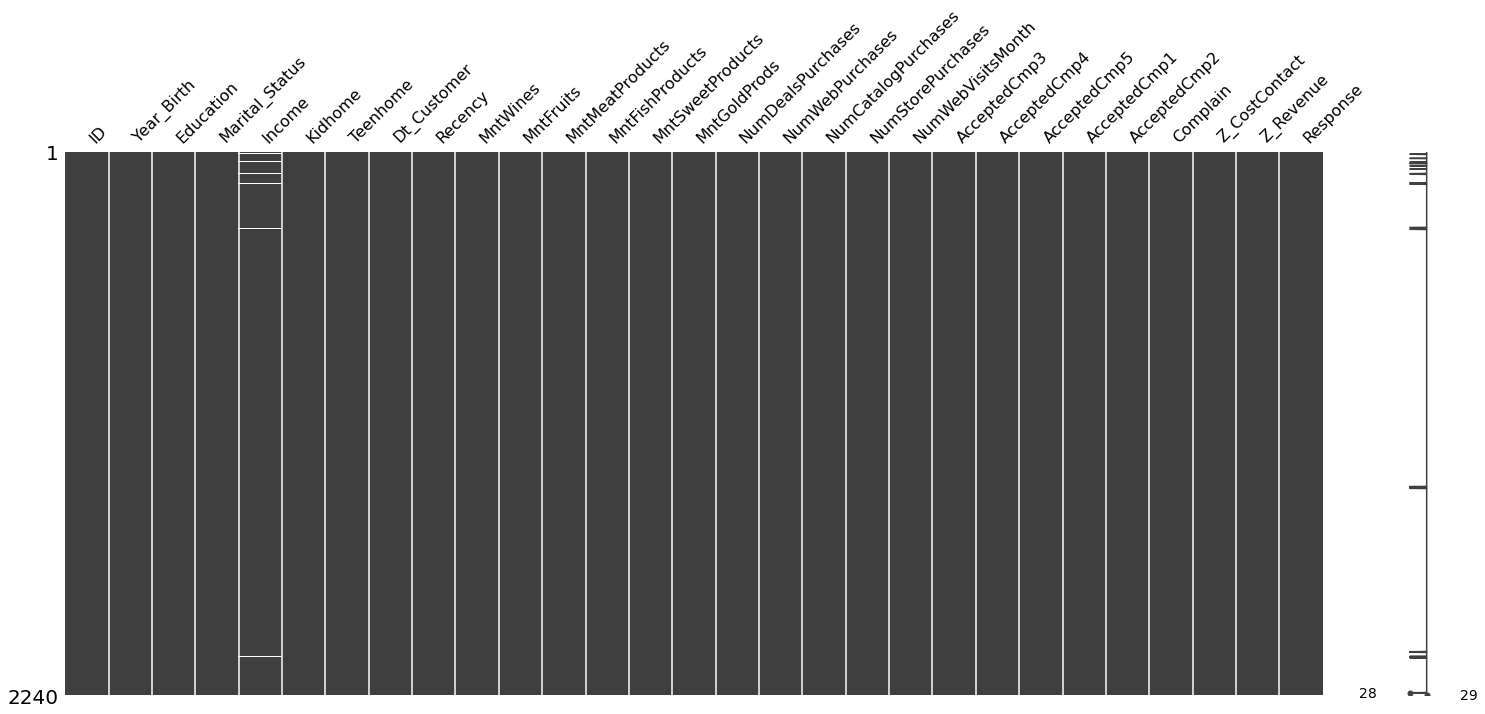

In [5]:
msno.matrix(df)
plt.show()

In [6]:
df[df.isna().any(axis=1)].head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
10,1994,1983,Graduation,Married,NaN,1,0,15-11-2013,11,5,...,7,0,0,0,0,0,0,3,11,0
27,5255,1986,Graduation,Single,NaN,1,0,20-02-2013,19,5,...,1,0,0,0,0,0,0,3,11,0
43,7281,1959,PhD,Single,NaN,0,0,05-11-2013,80,81,...,2,0,0,0,0,0,0,3,11,0
48,7244,1951,Graduation,Single,NaN,2,1,01-01-2014,96,48,...,6,0,0,0,0,0,0,3,11,0
58,8557,1982,Graduation,Single,NaN,1,0,17-06-2013,57,11,...,6,0,0,0,0,0,0,3,11,0


Delete the rows with missing values

In [7]:
df.dropna(axis=0, inplace=True)

### Calculate the customers' age

In [8]:
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


In [9]:
df['Age'] = datetime.now().year - df.Year_Birth

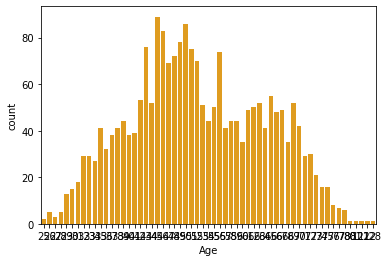

In [10]:
sns.countplot(x="Age", data=df, color='orange')

plt.show()

In [11]:
df.Age.describe()

count    2216.000000
mean       52.179603
std        11.985554
min        25.000000
25%        44.000000
50%        51.000000
75%        62.000000
max       128.000000
Name: Age, dtype: float64

### Clean up Education column

In [12]:
df.Education.value_counts()

Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: Education, dtype: int64

In [13]:
def edu(x):
    education = {
        'Basic'     :'Undergraduate',
        '2n Cycle'  :'Undergraduate',
        'Graduation':'Postgraduate',
        'Master'    :'Postgraduate',
        'PhD'       :'Postgraduate'
    }
    return education[x]

In [14]:
df['Simplified_Education'] = df.Education.apply(edu)

In [15]:
df[['Education', 'Simplified_Education']].head()

,Education,Simplified_Education
0,Graduation,Postgraduate
1,Graduation,Postgraduate
2,Graduation,Postgraduate
3,Graduation,Postgraduate
4,PhD,Postgraduate


### Clean up Marital Status column

In [16]:
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
YOLO          2
Absurd        2
Name: Marital_Status, dtype: int64

In [17]:
df[df['Marital_Status'] == 'YOLO']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Simplified_Education
2177,492,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,0,0,0,0,0,3,11,0,48,Postgraduate
2202,11133,1973,PhD,YOLO,48432.0,0,1,18-10-2012,3,322,...,0,0,0,0,0,3,11,1,48,Postgraduate


In [18]:
df[df['Marital_Status'] == 'Absurd']

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,Simplified_Education
2093,7734,1993,Graduation,Absurd,79244.0,0,0,19-12-2012,58,471,...,0,1,1,0,0,3,11,1,28,Postgraduate
2134,4369,1957,Master,Absurd,65487.0,0,0,10-01-2014,48,240,...,0,0,0,0,0,3,11,0,64,Postgraduate


Dropping the "YOLO" and "Absurd" marital status because we are not sure if that means "Single" or "In a relationship". We do not want to make assumptions that may be incorrect.

In [19]:
df = df[df.Marital_Status != 'YOLO']
df = df[df.Marital_Status != 'Absurd']

In [20]:
df.Marital_Status.value_counts()

Married     857
Together    573
Single      471
Divorced    232
Widow        76
Alone         3
Name: Marital_Status, dtype: int64

In [21]:
def married_single(x):
    relationship = {
        'Married' :'In couple',
        'Together':'In couple',
        'Single'  :'Alone',
        'Divorced':'Alone',
        'Widow'   :'Alone',
        'Alone'   :'Alone'
    }
    
    return relationship[x]

In [22]:
df['Relationship_Status'] = df.Marital_Status.apply(married_single)

In [23]:
df[['Marital_Status', 'Relationship_Status']]

,Marital_Status,Relationship_Status
0,Single,Alone
1,Single,Alone
2,Together,In couple
3,Together,In couple
4,Married,In couple
...,...,...
2235,Married,In couple
2236,Together,In couple
2237,Divorced,Alone
2238,Together,In couple


### Clean up the children column
We will calculate how many children are in each household and create a new column containing boolean data on whether or not the household has a child.

In [24]:
# Total number of children
df['Num_children'] = df.Kidhome + df.Teenhome

# Has a child (True/False)
df['Has_child'] = df['Num_children'].apply(lambda x: x != 0)

In [25]:
df[['Has_child', 'Num_children']]

,Has_child,Num_children
0,False,0
1,True,2
2,False,0
3,True,1
4,True,1
...,...,...
2235,True,1
2236,True,3
2237,False,0
2238,True,1


### Rename the products columns
We will rename the products columns to something simpler and easier to understand for our analysis. Then we will add the total amount of products purchased.

In [26]:
df = df.rename(columns={
    'MntWines'        :'Wines',
    'MntFruits'       :'Fruits',
    'MntMeatProducts' :'Meat',
    'MntFishProducts' :'Fish',
    'MntSweetProducts':'Sweets',
    'MntGoldProds'    :'Gold'
})


In [27]:
df.iloc[:,9:15]

,Wines,Fruits,Meat,Fish,Sweets,Gold
0,635,88,546,172,88,88
1,11,1,6,2,1,6
2,426,49,127,111,21,42
3,11,4,20,10,3,5
4,173,43,118,46,27,15
...,...,...,...,...,...,...
2235,709,43,182,42,118,247
2236,406,0,30,0,0,8
2237,908,48,217,32,12,24
2238,428,30,214,80,30,61


In [28]:
df['Total'] = df.iloc[:,9:15].sum(axis=1)

In [29]:
df.iloc[:,20:25]

,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0


### Remove outliers from Income column

In [30]:
df.Income.describe()

count      2212.000000
mean      52232.510850
std       25187.455359
min        1730.000000
25%       35233.500000
50%       51381.500000
75%       68522.000000
max      666666.000000
Name: Income, dtype: float64

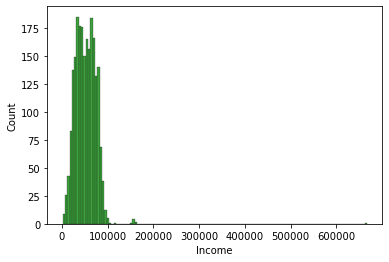

In [31]:
sns.histplot(x="Income", data=df, color='green')

plt.show()

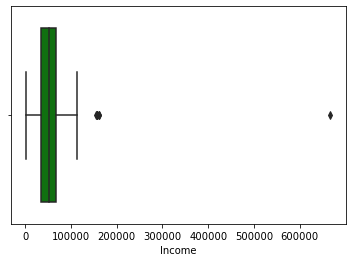

In [32]:
sns.boxplot(x="Income", data=df, color='green')

plt.show()

In [33]:
df[df['Income'] >= 150000]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Complain,Z_CostContact,Z_Revenue,Response,Age,Simplified_Education,Relationship_Status,Num_children,Has_child,Total
164,8475,1973,PhD,Married,157243.0,0,1,01-03-2014,98,20,...,0,3,11,0,48,Postgraduate,In couple,1,True,1608
617,1503,1976,PhD,Together,162397.0,1,1,03-06-2013,31,85,...,0,3,11,0,45,Postgraduate,In couple,2,True,107
655,5555,1975,Graduation,Divorced,153924.0,0,0,07-02-2014,81,1,...,0,3,11,0,46,Postgraduate,Alone,0,False,6
687,1501,1982,PhD,Married,160803.0,0,0,04-08-2012,21,55,...,0,3,11,0,39,Postgraduate,In couple,0,False,1717
1300,5336,1971,Master,Together,157733.0,1,0,04-06-2013,37,39,...,0,3,11,0,50,Postgraduate,In couple,1,True,59
1653,4931,1977,Graduation,Together,157146.0,0,0,29-04-2013,13,1,...,0,3,11,0,44,Postgraduate,In couple,0,False,1730
2132,11181,1949,PhD,Married,156924.0,0,0,29-08-2013,85,2,...,0,3,11,0,72,Postgraduate,In couple,0,False,8
2233,9432,1977,Graduation,Together,666666.0,1,0,02-06-2013,23,9,...,0,3,11,0,44,Postgraduate,In couple,1,True,62


In [34]:
df = df[df['Income'] <= 150000]

In [35]:
df.Income.describe()

count      2204.000000
mean      51617.730490
std       20721.492888
min        1730.000000
25%       35191.500000
50%       51301.000000
75%       68289.750000
max      113734.000000
Name: Income, dtype: float64

### Calculate the seniority of each customer

In [36]:
# Convert string to datetime object
df['Dt_Customer'] = df['Dt_Customer'].map(lambda x: datetime.strptime(x, '%d-%m-%Y').date())

In [37]:
# Calculate the number of days since customers joined
df['days_joined'] = datetime.now().date() - df.Dt_Customer
df['days_joined'] = df.days_joined.map(lambda x: x.days)

# Convert number of days to approximate years
# Approximate because it does not take into account leap years
df['years_joined'] = round(df.days_joined / 365, 3)

In [38]:
df[['Dt_Customer', 'days_joined', 'years_joined']]

,Dt_Customer,days_joined,years_joined
0,2012-09-04,3306,9.058
1,2014-03-08,2756,7.551
2,2013-08-21,2955,8.096
3,2014-02-10,2782,7.622
4,2014-01-19,2804,7.682
...,...,...,...
2235,2013-06-13,3024,8.285
2236,2014-06-10,2662,7.293
2237,2014-01-25,2798,7.666
2238,2014-01-24,2799,7.668


In [39]:
df.years_joined.describe()

count    2204.000000
mean        8.208920
std         0.554765
min         7.241000
25%         7.734000
50%         8.214000
75%         8.690000
max         9.156000
Name: years_joined, dtype: float64

# CONTINUE HERE

In [40]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish',
       'Sweets', 'Gold', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Simplified_Education', 'Relationship_Status', 'Num_children',
       'Has_child', 'Total', 'days_joined', 'years_joined'],
      dtype='object')

In [41]:
temp_df = df[['Age', 'Simplified_Education', 
              'Relationship_Status', 'Income', 
              'Num_children', 'Has_child', 
              'years_joined', 'Total']]

In [42]:
temp_df.head()

,Age,Simplified_Education,Relationship_Status,Income,Num_children,Has_child,years_joined,Total
0,64,Postgraduate,Alone,58138.0,0,False,9.058,1617
1,67,Postgraduate,Alone,46344.0,2,True,7.551,27
2,56,Postgraduate,In couple,71613.0,0,False,8.096,776
3,37,Postgraduate,In couple,26646.0,1,True,7.622,53
4,40,Postgraduate,In couple,58293.0,1,True,7.682,422
